In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
air=pd.read_excel("C:/Users/ADITYA/Downloads/Airlines+Data.xlsx")
air

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
air.shape

(96, 2)

In [4]:
air.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [5]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
air.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


C:\Users\ADITYA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Passengers'>

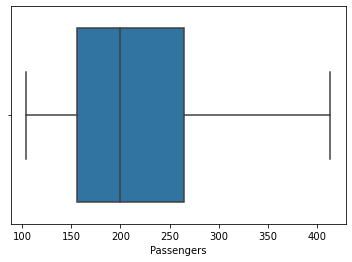

In [7]:
sns.boxplot("Passengers",data=air)

<AxesSubplot:>

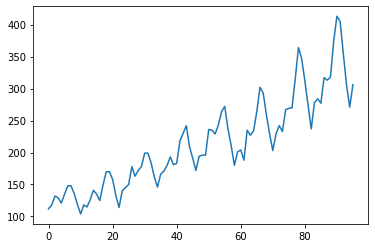

In [8]:
air.Passengers.plot()

<AxesSubplot:>

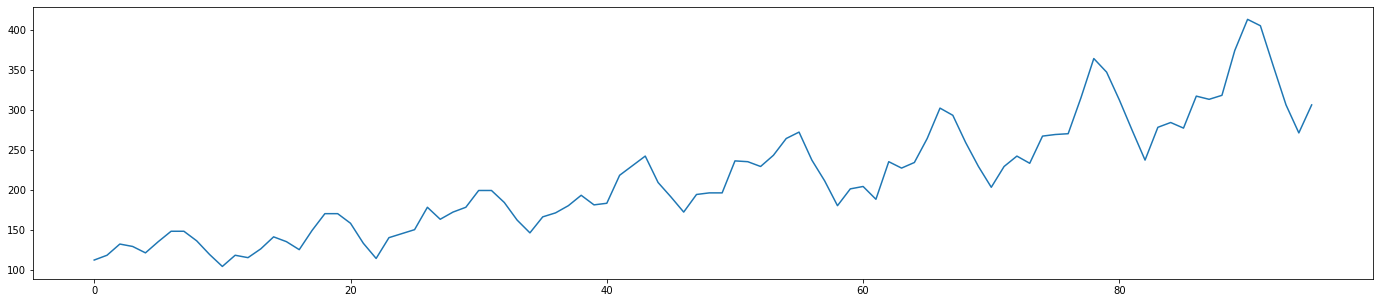

In [9]:
plt.figure(figsize=(24,5))
air.Passengers.plot()

In [10]:
air["Date"] = pd.to_datetime(air.Month,format="%b-%y")

In [11]:
air["month"] = air.Date.dt.strftime("%b") # month extraction
air["year"] = air.Date.dt.strftime("%y") # year extraction

In [12]:
air

,Month,Passengers,Date,month,year
0,1995-01-01,112,1995-01-01,Jan,95
1,1995-02-01,118,1995-02-01,Feb,95
2,1995-03-01,132,1995-03-01,Mar,95
3,1995-04-01,129,1995-04-01,Apr,95
4,1995-05-01,121,1995-05-01,May,95
...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,02
92,2002-09-01,355,2002-09-01,Sep,02
93,2002-10-01,306,2002-10-01,Oct,02
94,2002-11-01,271,2002-11-01,Nov,02


<AxesSubplot:xlabel='month', ylabel='year'>

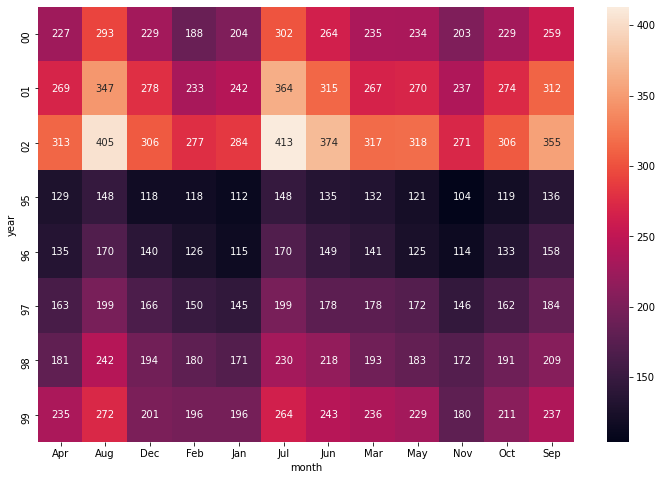

In [14]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=air,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
#we can know which year and month has more no of passengers and less no of passengers

<AxesSubplot:xlabel='year', ylabel='Passengers'>

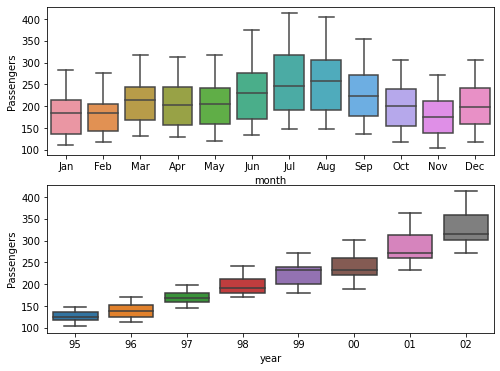

In [15]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=air)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=air)

<ipython-input-16-d46f5b85012d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air['month'][i]= A[0:3]


<AxesSubplot:>

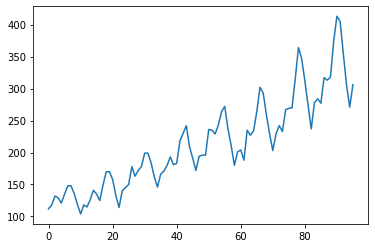

In [16]:
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
#import numpy as np
A = air["month"][0]
A[0:3]
air['Month']= 0

for i in range(96):
    A = air["month"][i]
    air['month'][i]= A[0:3]
    
month_dummies = pd.DataFrame(pd.get_dummies(air['month']))
air1 = pd.concat([air.Passengers,month_dummies],axis = 1)

air1["t"] = np.arange(1,97)

air1["t_square"] = air1["t"]*air1["t"]
air1.columns
air1["log_Passengers"] = np.log(air1["Passengers"])
air1.rename(columns={"Passengers ": 'Passengers'}, inplace=True)
air1.Passengers.plot()

In [17]:
air1

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,112,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,129,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,271,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


<AxesSubplot:xlabel='year', ylabel='Passengers'>

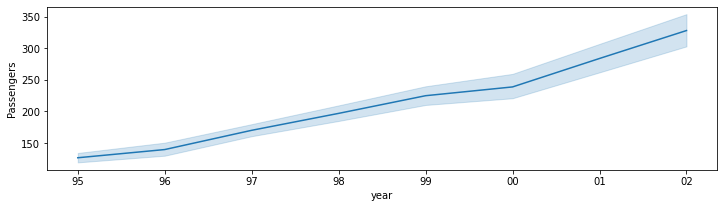

In [18]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=air)

# splitting data

In [20]:
Train = air1.head(76)
Test = air1.tail(20)

In [21]:
Train

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,112,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,129,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,229,0,0,1,0,0,0,0,0,0,0,0,0,72,5184,5.433722
72,242,0,0,0,0,1,0,0,0,0,0,0,0,73,5329,5.488938
73,233,0,0,0,1,0,0,0,0,0,0,0,0,74,5476,5.451038
74,267,0,0,0,0,0,0,0,1,0,0,0,0,75,5625,5.587249


In [22]:
Test

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
76,270,0,0,0,0,0,0,0,0,1,0,0,0,77,5929,5.598422
77,315,0,0,0,0,0,0,1,0,0,0,0,0,78,6084,5.752573
78,364,0,0,0,0,0,1,0,0,0,0,0,0,79,6241,5.897154
79,347,0,1,0,0,0,0,0,0,0,0,0,0,80,6400,5.849325
80,312,0,0,0,0,0,0,0,0,0,0,0,1,81,6561,5.743003
81,274,0,0,0,0,0,0,0,0,0,0,1,0,82,6724,5.613128
82,237,0,0,0,0,0,0,0,0,0,1,0,0,83,6889,5.468060
83,278,0,0,1,0,0,0,0,0,0,0,0,0,84,7056,5.627621
84,284,0,0,0,0,1,0,0,0,0,0,0,0,85,7225,5.648974
85,277,0,0,0,1,0,0,0,0,0,0,0,0,86,7396,5.624018


In [23]:
#linear model
import statsmodels.formula.api as smf 
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

57.00014788256585

In [24]:
#exponential
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.621543947194006

In [25]:
#quadratic
Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

58.494274639472664

In [26]:
#Additive seasonality 
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.2541343994949

In [27]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

39.75976633805682

In [28]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

137.61090856256564

In [30]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

11.784250178761212

# compare results

In [31]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,11.784250
4,rmse_add_sea_quad,39.759766
1,rmse_Exp,46.621544
0,rmse_linear,57.000148
2,rmse_Quad,58.494275
3,rmse_add_sea,132.254134
5,rmse_Mult_sea,137.610909


# predict the new time period

In [33]:
model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=air1).fit()

In [34]:
pred_new  = pd.Series(Mul_Add_sea.predict(air1))
pred_new

0     4.697298
1     4.712892
2     4.857256
3     4.821524
4     4.813365
        ...   
91    5.963853
92    5.856549
93    5.729468
94    5.599957
95    5.735181
Length: 96, dtype: float64

In [35]:
Test["forecasted_Passengers"] = pd.DataFrame(pred_new)

<ipython-input-35-c9cf2a948a46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test["forecasted_Passengers"] = pd.DataFrame(pred_new)


In [36]:
Test

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers,forecasted_Passengers
76,270,0,0,0,0,0,0,0,0,1,0,0,0,77,5929,5.598422,5.609340
77,315,0,0,0,0,0,0,1,0,0,0,0,0,78,6084,5.752573,5.721737
78,364,0,0,0,0,0,1,0,0,0,0,0,0,79,6241,5.897154,5.822781
79,347,0,1,0,0,0,0,0,0,0,0,0,0,80,6400,5.849325,5.831190
80,312,0,0,0,0,0,0,0,0,0,0,0,1,81,6561,5.743003,5.723887
81,274,0,0,0,0,0,0,0,0,0,0,1,0,82,6724,5.613128,5.596806
82,237,0,0,0,0,0,0,0,0,0,1,0,0,83,6889,5.468060,5.467294
83,278,0,0,1,0,0,0,0,0,0,0,0,0,84,7056,5.627621,5.602519
84,284,0,0,0,0,1,0,0,0,0,0,0,0,85,7225,5.648974,5.625936
85,277,0,0,0,1,0,0,0,0,0,0,0,0,86,7396,5.624018,5.641529


In [37]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

In [39]:
# load data
train = pd.read_excel("C:/Users/ADITYA/Downloads/Airlines+Data.xlsx", header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [40]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>Predicted=259.000, Expected=229.000
>Predicted=229.000, Expected=203.000
>Predicted=203.000, Expected=229.000
>Predicted=229.000, Expected=242.000
>Predicted=242.000, Expected=233.000
>Predicted=233.000, Expected=267.000
>

In [41]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [42]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [43]:
# load dataset
train = pd.read_excel("C:/Users/ADITYA/Downloads/Airlines+Data.xlsx", header=0, index_col=0, parse_dates=True,squeeze=True)
#evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=96.356
ARIMA(0, 0, 1) RMSE=52.891
ARIMA(0, 1, 0) RMSE=28.864
ARIMA(0, 1, 1) RMSE=27.487
ARIMA(0, 1, 2) RMSE=30.150
ARIMA(0, 1, 3) RMSE=26.117
ARIMA(0, 1, 4) RMSE=24.350
ARIMA(0, 2, 0) RMSE=34.668
ARIMA(0, 2, 1) RMSE=29.555
ARIMA(0, 2, 2) RMSE=28.004
ARIMA(0, 2, 3) RMSE=29.026
ARIMA(0, 2, 4) RMSE=26.723
ARIMA(1, 0, 0) RMSE=29.315
ARIMA(1, 0, 1) RMSE=27.645
ARIMA(1, 0, 2) RMSE=440.446
ARIMA(1, 1, 0) RMSE=28.177
ARIMA(1, 2, 0) RMSE=34.286
ARIMA(2, 0, 0) RMSE=28.430
ARIMA(2, 1, 0) RMSE=27.543
ARIMA(2, 2, 0) RMSE=32.527
ARIMA(3, 0, 0) RMSE=27.924
ARIMA(3, 0, 1) RMSE=26.734
ARIMA(3, 1, 0) RMSE=28.082
ARIMA(3, 2, 0) RMSE=33.160
ARIMA(4, 0, 0) RMSE=28.445
ARIMA(4, 1, 0) RMSE=26.957
ARIMA(4, 2, 0) RMSE=31.096
ARIMA(4, 2, 1) RMSE=27.544
Best ARIMA(0, 1, 4) RMSE=24.350


# build model based on optimized values


In [44]:
#load data
train = pd.read_excel("C:/Users/ADITYA/Downloads/Airlines+Data.xlsx", header=0, index_col=0, parse_dates=True)

In [45]:
#prepare data
X = train.values
X = X.astype('float32')

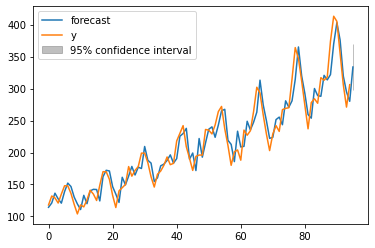

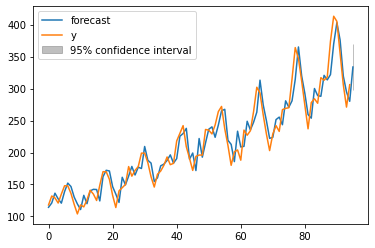

In [46]:
#fit model
model = ARIMA(X, order=(0,1,4))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 96)

# combine train and test data and build final model

In [48]:
#fit model
df = pd.read_excel("C:/Users/ADITYA/Downloads/Airlines+Data.xlsx")
df1= df.set_index('Month')


In [49]:
#prepare data
X = df1.values
X = X.astype('float32')

In [50]:
model = ARIMA(X, order=(0,1,4))
model_fit = model.fit()

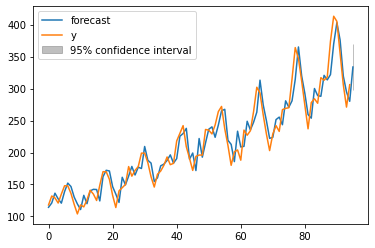

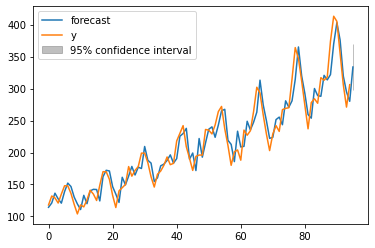

In [51]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,96)

In [52]:
forecast

array([333.64542033, 338.10561726, 344.4764098 , 334.99091438,
       337.34157055, 339.69222672, 342.0428829 , 344.39353907,
       346.74419524, 349.09485141])